In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Dataset')

#print list of classes in dataset
print (dataset_path)

print("Types of classes labels found: ", len(dataset_path))

['earphone', 'headphone', 'phone']
Types of classes labels found:  3


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('/content/drive/MyDrive/Dataset' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [ ]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

     Labels                                              image
0  earphone   /content/drive/MyDrive/Dataset/earphone/ear5.jpg
1  earphone   /content/drive/MyDrive/Dataset/earphone/ear7.jpg
2  earphone   /content/drive/MyDrive/Dataset/earphone/are8.jpg
3  earphone   /content/drive/MyDrive/Dataset/earphone/ear9.jpg
4  earphone  /content/drive/MyDrive/Dataset/earphone/ear10.jpg
    Labels                                          image
519  phone  /content/drive/MyDrive/Dataset/phone/p126.jpg
520  phone  /content/drive/MyDrive/Dataset/phone/p127.jpg
521  phone  /content/drive/MyDrive/Dataset/phone/p128.jpg
522  phone  /content/drive/MyDrive/Dataset/phone/p129.jpg
523  phone  /content/drive/MyDrive/Dataset/phone/p130.jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  524
headphone    206
phone        183
earphone     135
Name: Labels, dtype: int64


In [ ]:
import cv2
path = '/content/drive/MyDrive/Dataset/'
dataset_path = os.listdir('/content/drive/MyDrive/Dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(524, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earph

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(497, 224, 224, 3)
(497, 3)
(27, 224, 224, 3)
(27, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 3)                 4053414   
 )                                                               
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
16/16 - 165s - loss: 3.5924 - accuracy: 0.3602 - 165s/epoch - 10s/step
Epoch 2/30
16/16 - 138s - loss: 2.7612 - accuracy: 0.3944 - 138s/epoch - 9s/step
Epoch 3/30
16/16 - 134s - loss: 1.8135 - accuracy: 0.4427 - 134s/epoch - 8s/step
Epoch 4/30
16/16 - 138s - loss: 1.5902 - accuracy: 0.4326 - 138s/epoch - 9s/step
Epoch 5/30
16/16 - 140

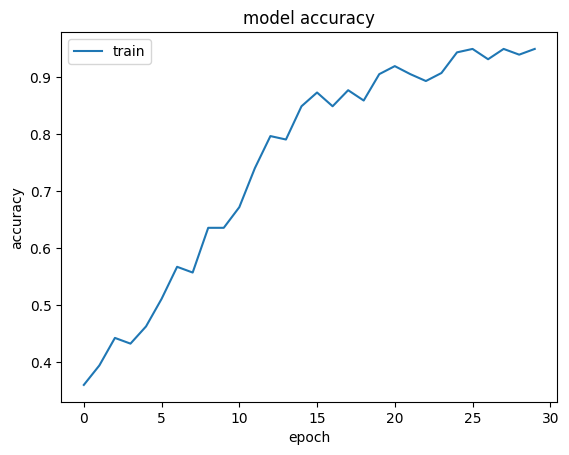

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 8s 8s/step - loss: 1.2760 - accuracy: 0.4444
Loss = 1.2760027647018433
Test Accuracy = 0.4444444477558136


Input image shape: (1, 224, 224, 3)


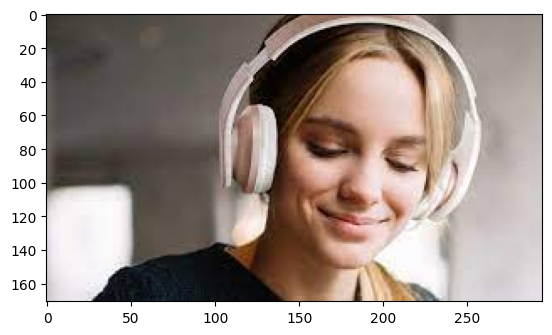

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/Dataset/h.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 4s 4s/step


array([[0., 1., 0.]], dtype=float32)

Input image shape: (1, 224, 224, 3)


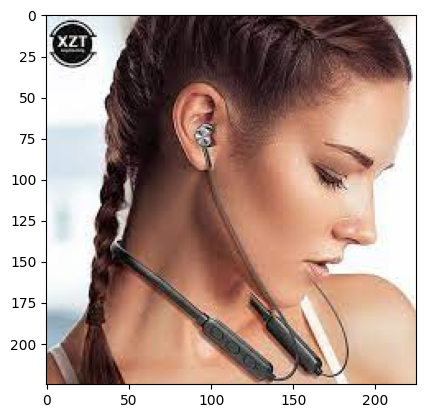

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/Dataset/e.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 0s 251ms/step


array([[0., 1., 0.]], dtype=float32)

Input image shape: (1, 224, 224, 3)


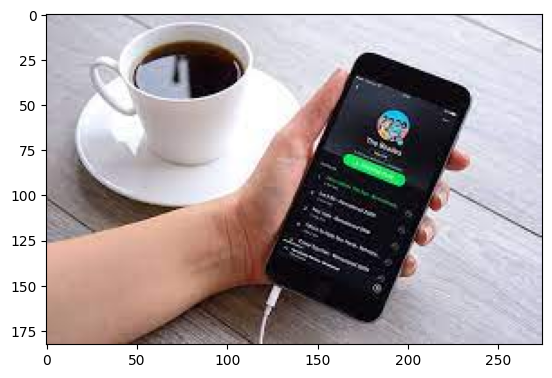

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/Dataset/p1.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds

1/1 [==============================] - 0s 89ms/step


array([[0., 1., 0.]], dtype=float32)